Looking at overlap of proteins between and within projects of cells

Goal is to create upsetplots and heatmaps worthy to be included in a poster

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
metadata = pd.read_csv("../Metadata/unified_metadata.csv")

In [5]:
nsaf_data = pd.read_hdf("../Atlas_creation/proteome_nsaf_pooled_3.h5")
nsaf_data = nsaf_data.pivot(index = "assay_id", columns="uniprot_id", values="NSAF")

In [12]:
metadata = metadata[metadata.assay_id.isin(nsaf_data.index)]

In [4]:
breast_meta = metadata[(metadata.tissue_type == "breast") & (metadata.assay_id.isin(nsaf_data.index))]

In [5]:
breast_meta.head()

,assay_id,project_id,filename,cell_id,cell_line,disease,treatment,tissue_type,sub_cell,organ_id,PXD_accession,all_PSM,sign_PSM,peptides,proteins,experiment_type,instrument,pmid,pool_id
289,31254,1821,MCF7_1a,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD008719,84401,17557,5874,1653,in-solution,Q-exactive,29751106,0
290,31255,1821,MCF7_1b,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD008719,86167,17779,6063,1682,in-solution,Q-exactive,29751106,0
291,31256,1821,MCF7_2a,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD008719,93486,20251,6956,1883,in-solution,Q-exactive,29751106,0
292,31257,1821,MCF7_2b,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD008719,92617,19912,6778,1865,in-solution,Q-exactive,29751106,0
293,31258,1821,MCF7_3a,551,MCF7,adenocarcinoma,/,breast,/,NaN,PXD008719,90763,19322,6656,1873,in-solution,Q-exactive,29751106,0


In [48]:
def calculate_overlap(meta):

    overlap_tissue = {}
    for assay_id in meta.assay_id:
        overlap_tissue[assay_id] = []
        assay_id_prot = set(nsaf_data.loc[assay_id, nsaf_data.loc[assay_id].notna()].index.tolist())
        
        for comp_id in meta.assay_id:
            comp_id_prot = set(nsaf_data.loc[comp_id, nsaf_data.loc[comp_id].notna()].index.tolist())

            value = len(assay_id_prot.intersection(comp_id_prot)) / max(len(assay_id_prot), len(comp_id_prot))

            overlap_tissue[assay_id].append(value)
    return overlap_tissue

def lutinize_metadata(metadata, col):
    colors = sns.color_palette("Paired") + sns.color_palette("dark") + sns.color_palette("bright") + sns.color_palette("pastel") + sns.color_palette("Set2")
    
    colormap = {}
    for i, pxd in enumerate(metadata[col].unique()):
        colormap[pxd] = colors[i]

    metadata[f"lut_{col}"] = metadata[col].apply(lambda x: colormap[x])

def make_clustermap_tissue(tissue):

    tissue_meta = metadata[(metadata.tissue_type == tissue) & (metadata.assay_id.isin(nsaf_data.index))]

    print("Calculating overlap")
    overlap_tissue = calculate_overlap(tissue_meta)
    print("Overlap calculated")
    
    lutinize_metadata(tissue_meta, "PXD_accession")
    lutinize_metadata(tissue_meta, "cell_line")

    print("Generating clustermap")
    sns.clustermap(pd.DataFrame(overlap_tissue, index=overlap_tissue.keys()), row_colors= tissue_meta.set_index("assay_id").lut_PXD_accession,
               col_colors= tissue_meta.set_index("assay_id").lut_cell_line, vmin = 0, vmax = 1)

def make_clustermap_cell(cell):

    cell_meta = metadata[(metadata.cell_line == cell) & (metadata.assay_id.isin(nsaf_data.index))]

    print("Calculating overlap")
    overlap_tissue = calculate_overlap(cell_meta)
    print("Overlap calculated")
    
    lutinize_metadata(cell_meta, "PXD_accession")
    lutinize_metadata(cell_meta, "treatment")

    print("Generating clustermap")
    sns.clustermap(pd.DataFrame(overlap_tissue, index=overlap_tissue.keys()), row_colors= cell_meta.set_index("assay_id").lut_PXD_accession,
               col_colors= cell_meta.set_index("assay_id").lut_treatment, vmin = 0, vmax = 1)

def make_clustermap_all():
    meta = metadata[(metadata.assay_id.isin(nsaf_data.index))]

    print("Calculating overlap")
    overlap_tissue = calculate_overlap(meta)
    print("Overlap calculated")

    lutinize_metadata(meta, "PXD_accession")
    lutinize_metadata(meta, "tissue_type")

    print("Generating clustermap")
    sns.clustermap(pd.DataFrame(overlap_tissue, index=overlap_tissue.keys()), row_colors= meta.set_index("assay_id").lut_PXD_accession,
               col_colors= meta.set_index("assay_id").lut_tissue_type, vmin = 0, vmax = 1)

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


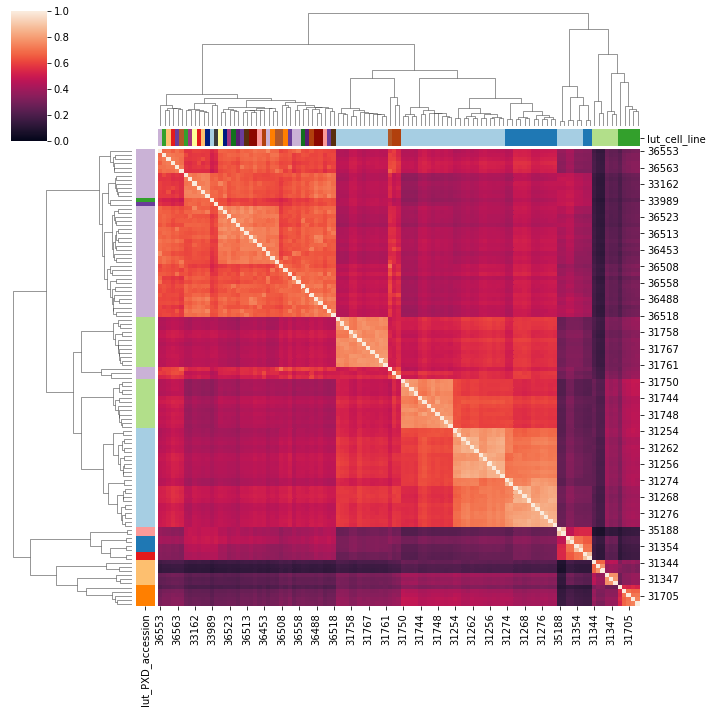

In [36]:
make_clustermap_tissue("breast")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


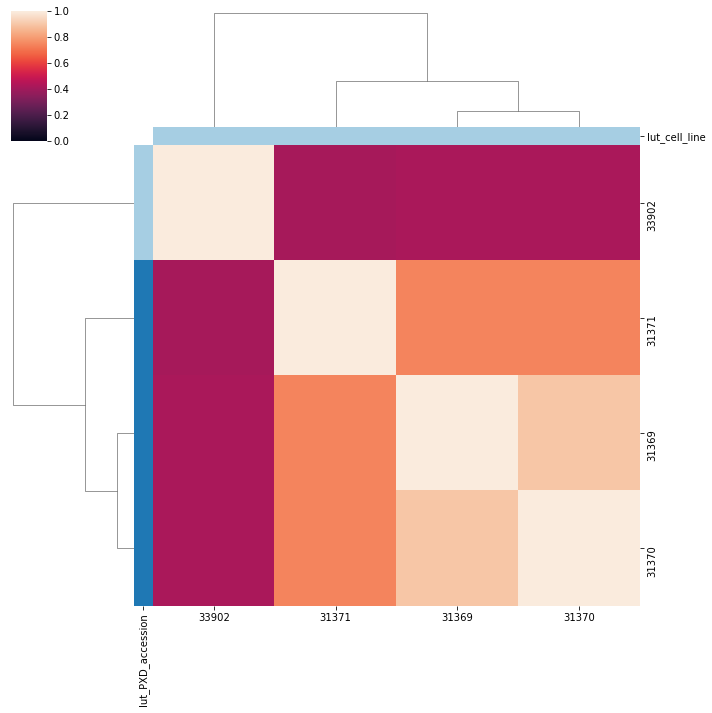

In [37]:
make_clustermap_tissue("prostate")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


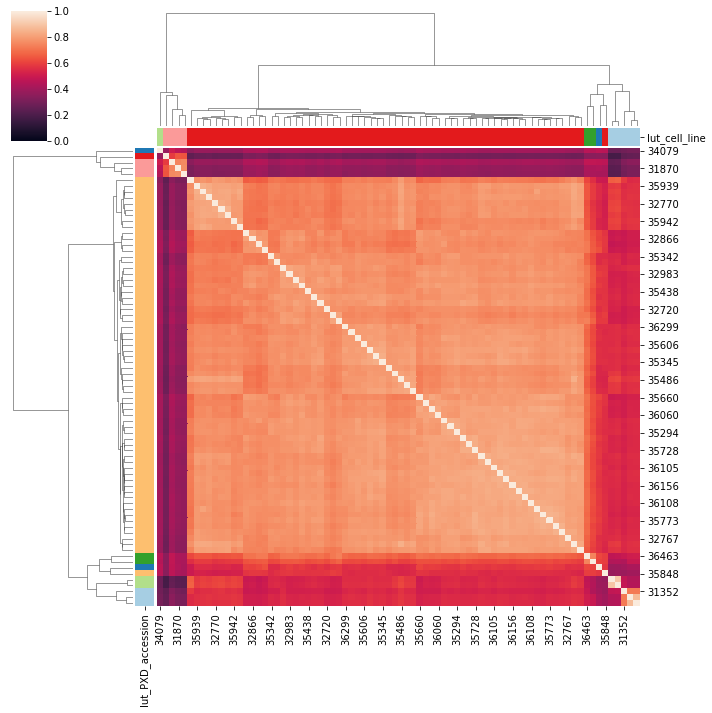

In [38]:
make_clustermap_tissue("colon")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


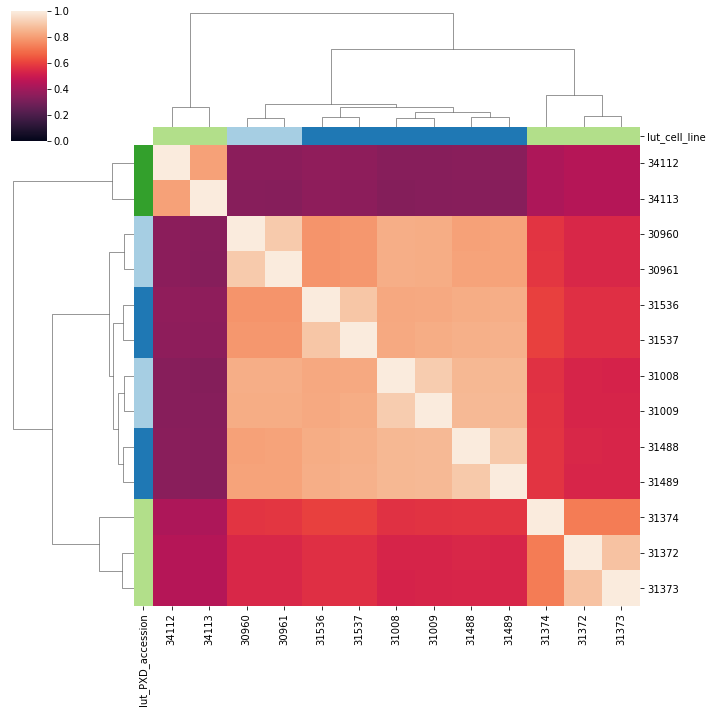

In [39]:
make_clustermap_tissue("liver")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


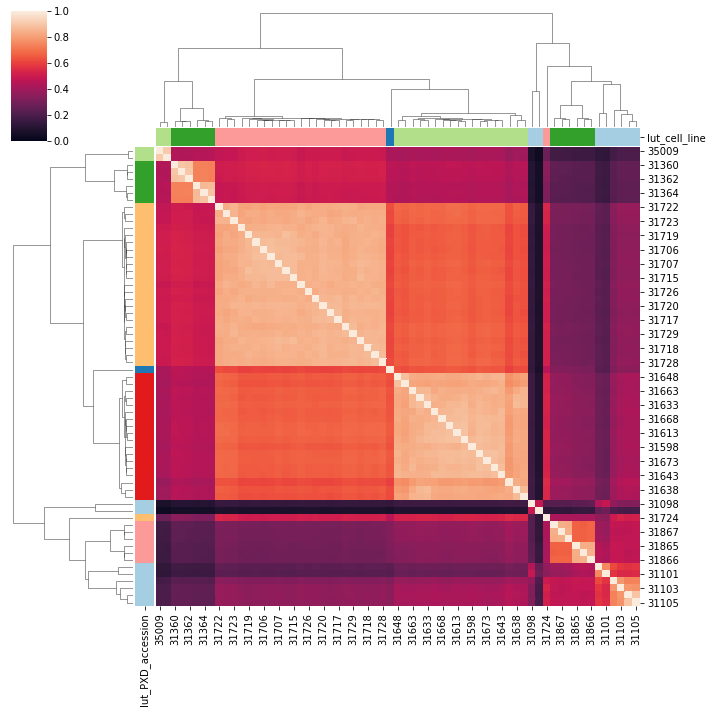

In [40]:
make_clustermap_tissue("brain")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


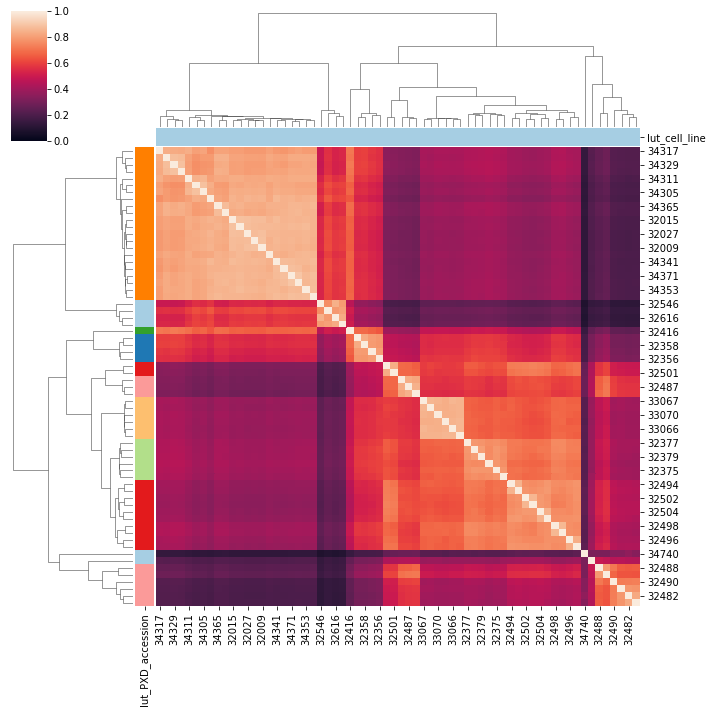

In [41]:
make_clustermap_tissue("cervix")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


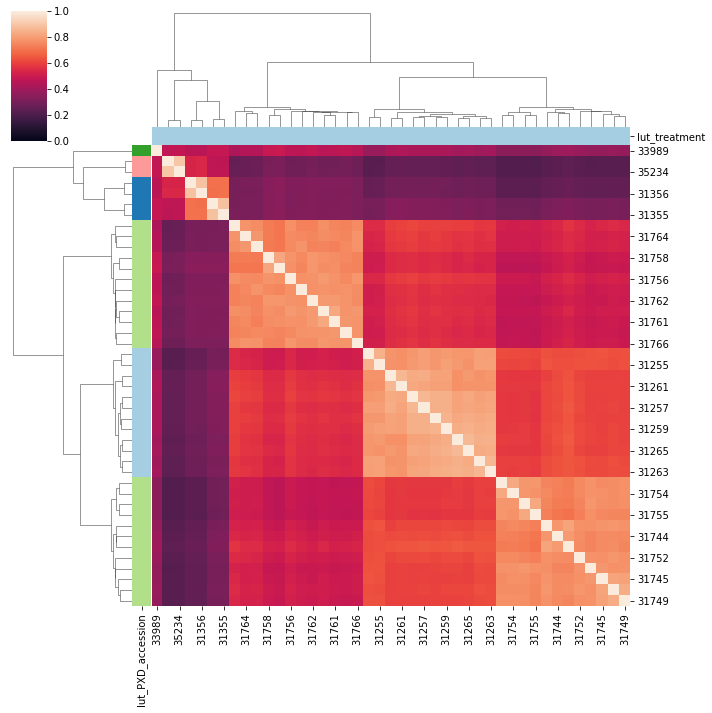

In [49]:
make_clustermap_cell("MCF7")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


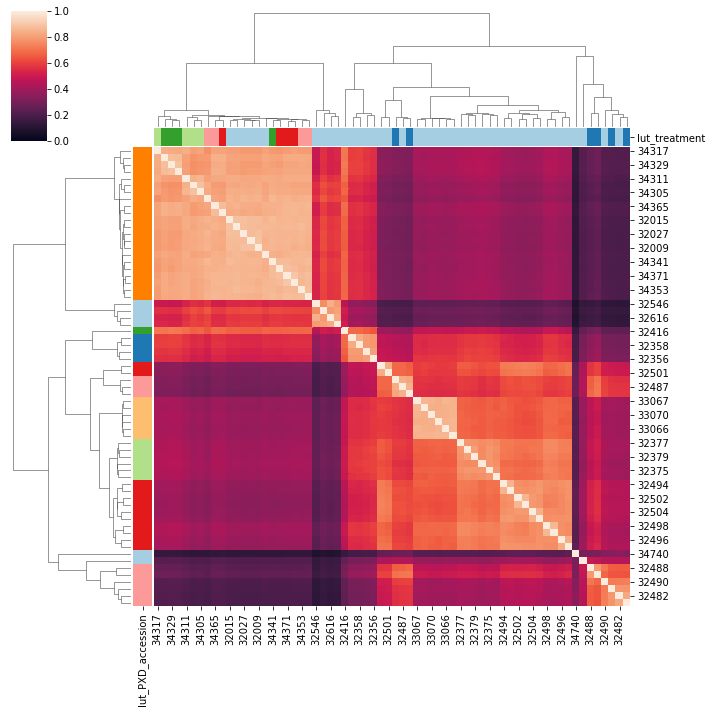

In [50]:
make_clustermap_cell("HeLa")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


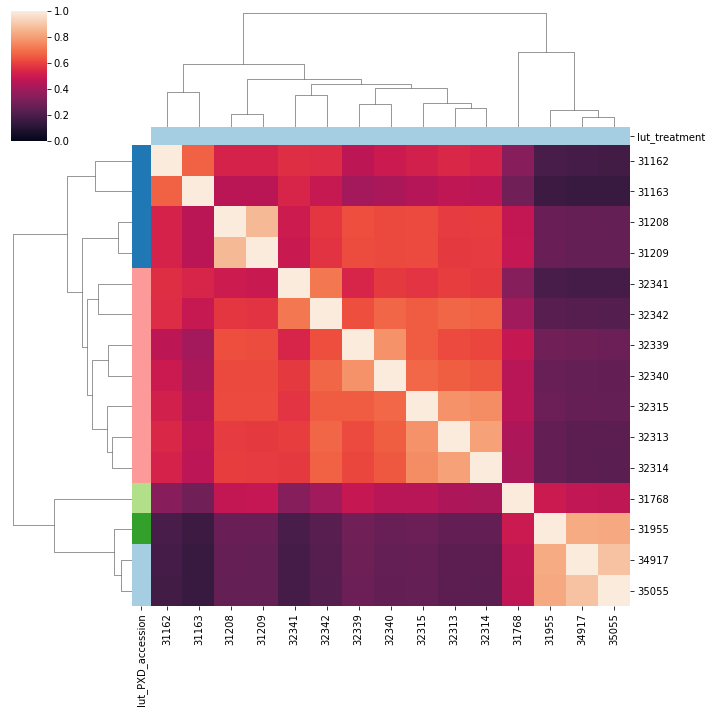

In [51]:
make_clustermap_cell("HEK293")

Calculating overlap
Overlap calculated
Generating clustermap


/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/compomics/miniconda3/envs/ionbot/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


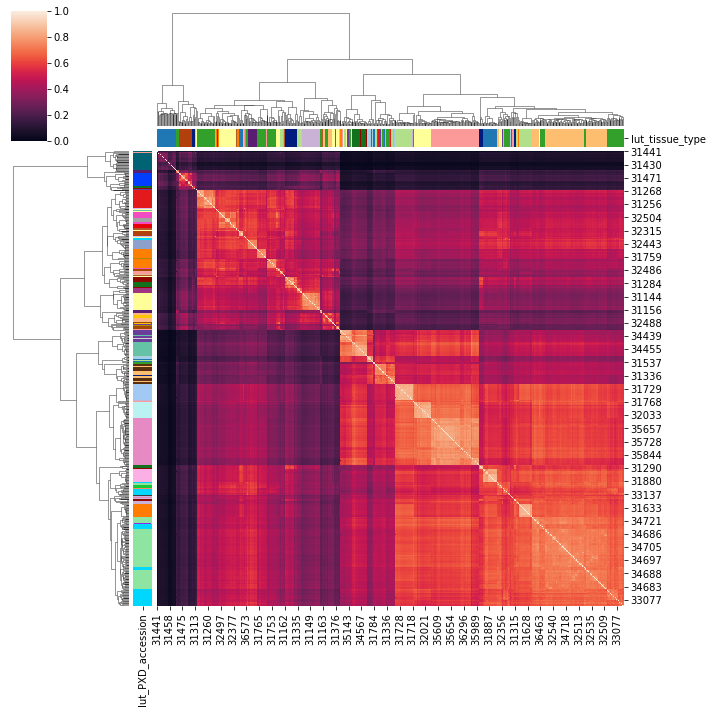

In [52]:
make_clustermap_all()

In [28]:
prot_vers = pd.concat([nsaf_data.notna().sum(axis = 1), metadata.set_index("assay_id")["ionbot_version"]], axis = 1).rename(columns = {0: "proteins"})

In [29]:
prot_vers

,proteins,ionbot_version
assay_id,,
30960,8180,IONBOT_v0.8.0
30961,8166,IONBOT_v0.8.0
31008,8117,IONBOT_v0.8.0
31009,8040,IONBOT_v0.8.0
31098,591,IONBOT_v0.6.2
...,...,...
36558,2895,IONBOT_v0.7.0
36563,2540,IONBOT_v0.7.0
36568,2789,IONBOT_v0.7.0


<BarContainer object of 4 artists>

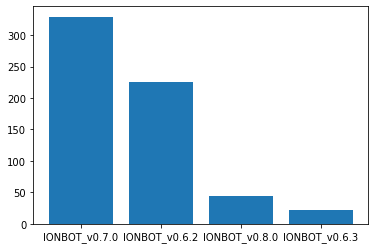

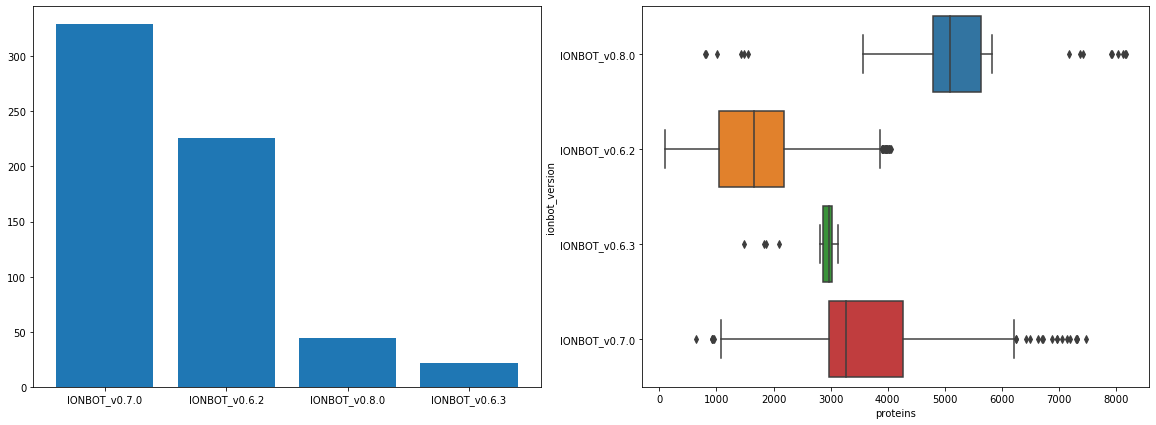

In [35]:
fig, ax = plt.subplots(1,2,figsize= (20,7))

ax[0].bar(x=prot_vers.ionbot_version.value_counts().index, height=prot_vers.ionbot_version.value_counts())
sns.boxplot(data = prot_vers, 
           x = "proteins", y = "ionbot_version", ax = ax[1])

In [40]:
metadata[metadata.assay_id == 31433]

,assay_id,project_id,filename,cell_id,cell_line,disease,treatment,tissue_type,sub_cell,organ_id,PXD_accession,all_PSM,sign_PSM,peptides,proteins,experiment_type,instrument,pmid,pool_id,ionbot_version
1669,31433,1830,HL60_1hr_ctrl_4,571,HL60,myeloid leukemia,/,blood,/,NaN,PXD009149,28620,460,166,139,in-solution,Q-exactive,30114907,0,IONBOT_v0.6.2


In [38]:
prot_vers[prot_vers.proteins < 1000]

,proteins,ionbot_version
assay_id,,
31098,591,IONBOT_v0.6.2
31099,312,IONBOT_v0.6.2
31298,470,IONBOT_v0.6.2
31308,522,IONBOT_v0.6.2
31313,509,IONBOT_v0.6.2
31324,587,IONBOT_v0.6.2
31346,808,IONBOT_v0.8.0
31348,795,IONBOT_v0.8.0
31429,100,IONBOT_v0.6.2
